In [3]:
%load_ext autoreload
%autoreload 2

# load environment variables
import os
from dotenv import load_dotenv, find_dotenv
dotenv_path = find_dotenv()
load_dotenv(dotenv_path)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sqlalchemy import create_engine

from src.functions.io import ModuleFileReader
from src import queries
scripts = ModuleFileReader(queries)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
engine = create_engine(os.environ.get("DATABASE_URL"))

## Basic Film View

In [5]:
films = pd.read_sql_query(scripts.read("film_view1.sql"), engine)
films.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2195 entries, 0 to 2194
Data columns (total 11 columns):
id             2195 non-null int64
title          2195 non-null object
released       2195 non-null datetime64[ns]
runtime        2195 non-null int64
rated          2195 non-null object
budget         1413 non-null float64
total_gross    1496 non-null float64
award_noms     2195 non-null int64
award_wins     2195 non-null int64
oscar_noms     2195 non-null int64
oscar_wins     2195 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(6), object(2)
memory usage: 188.7+ KB


- budget and total gross are floats due to NAN values
- only have about 64% of the data for budget and total gross

In [6]:
# to get rid of scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [7]:
films.describe()

,id,runtime,budget,total_gross,award_noms,award_wins,oscar_noms,oscar_wins
count,2195.000,2195.000,1413.000,1496.000,2195.000,2195.000,2195.000,2195.000
mean,1173.786,106.777,42782498.284,123432881.556,13.958,4.542,0.160,0.067
std,683.256,18.754,50315785.231,192306830.013,32.250,18.155,0.697,0.432
min,1.000,2.000,1.000,3948.000,0.000,0.000,0.000,0.000
25%,576.500,94.000,10000000.000,11200000.000,0.000,0.000,0.000,0.000
50%,1174.000,104.000,25000000.000,47300000.000,2.000,0.000,0.000,0.000
75%,1763.500,117.000,50000000.000,147075000.000,12.000,0.000,0.000,0.000
max,2360.000,212.000,300000000.000,2048359754.000,326.000,235.000,10.000,7.000


- most films get no award noms, mean is being skewed by outliers
- min budget being a dollar seems wrong

In [8]:
films[films.budget == 1.0]

,id,title,released,runtime,rated,budget,total_gross,award_noms,award_wins,oscar_noms,oscar_wins
1652,1771,Comic-Con Episode IV: A Fan's Hope,2011-09-10,88,PG-13,1.000,nan,0,0,0,0


In [9]:
films[films.runtime == 212.0]

,id,title,released,runtime,rated,budget,total_gross,award_noms,award_wins,oscar_noms,oscar_wins
652,686,Ben-Hur,2016-08-19,212,G,100000000.000,94100000.000,13,17,0,0


- the runtime here has been confused with the 1959 version of Ben Hur

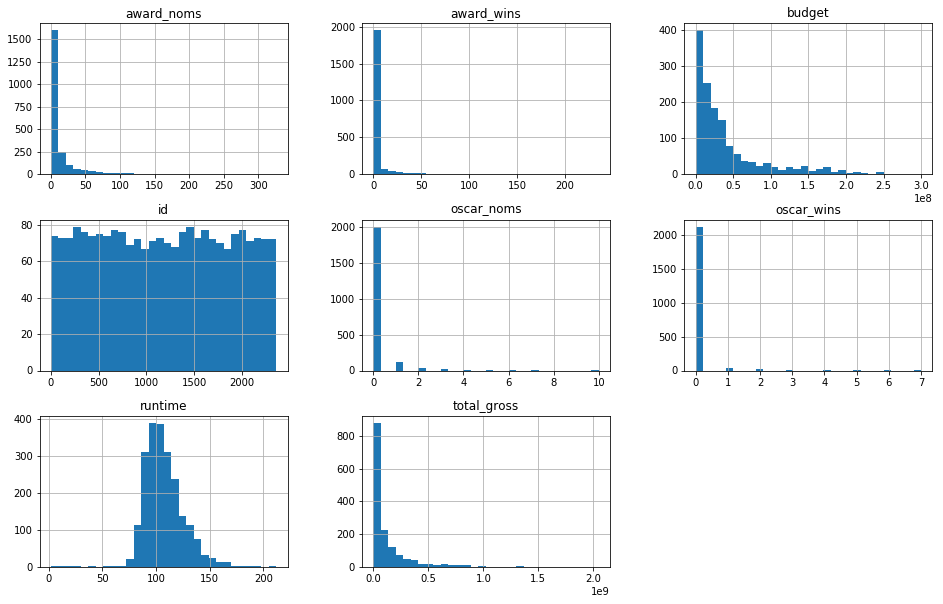

In [10]:
films.hist(bins=30, figsize=(16,10))
plt.show()

 - awards, budget, total gross also seem to follow pareto distribution, long right tails
 - runtime almost normally distributed except for no left side tail - very few short feature films

### Number of films each year

In [11]:
films_by_year = pd.read_sql_query(scripts.read("films_by_year_count.sql"), engine)

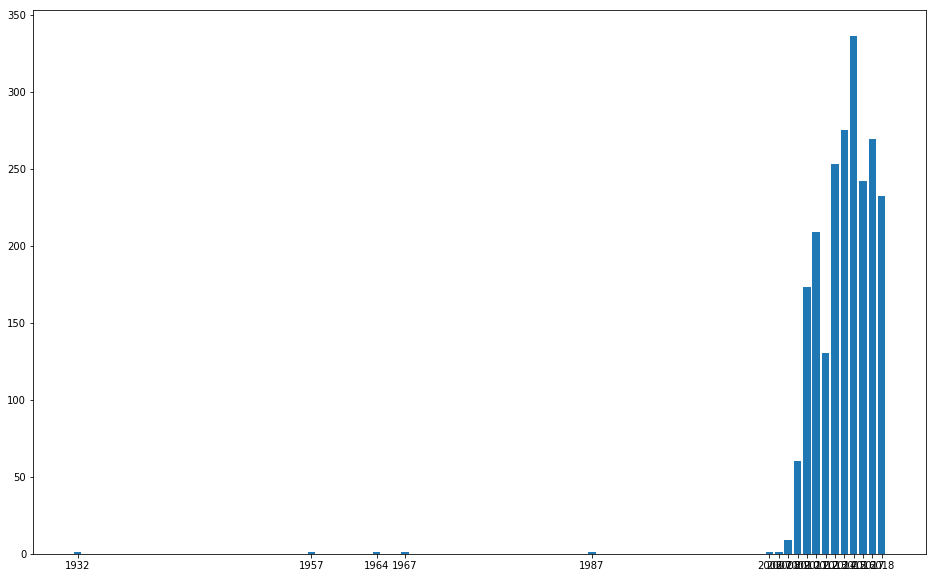

In [12]:
plt.figure(figsize=(16,10))
plt.bar(films_by_year.year, films_by_year.num_films)
plt.xticks(films_by_year.year)
plt.show()

- somehow some older movies snuck into the data

In [13]:
films[films.released < '2010-01-01']

,id,title,released,runtime,rated,budget,total_gross,award_noms,award_wins,oscar_noms,oscar_wins
234,251,The Silence,1964-02-03,96,R,nan,nan,1,0,0,0
1174,1259,Repentance,1987-03-01,153,PG,nan,nan,1,11,0,0
1711,1838,Magical Mystery Tour,1967-12-26,55,NOT RATED,nan,nan,0,0,0,0
1743,1877,The Time That Remains,2009-08-12,109,NOT RATED,nan,nan,5,0,0,0
1854,1991,Rapt,2009-11-18,125,NOT RATED,nan,5500000.000,0,0,0,0
1952,2095,Garbage Dreams,2009-07-31,79,N/A,nan,nan,2,0,0,0
1958,2102,Wonderful World,2009-06-05,89,R,nan,nan,0,0,0,0
1960,2105,44 Inch Chest,2009-10-19,95,R,nan,nan,2,0,0,0
1961,2106,Fish Tank,2009-05-14,123,NOT RATED,3000000.000,5900000.000,28,0,0,0
1964,2109,Creation,2009-09-25,108,PG-13,nan,nan,0,0,0,0


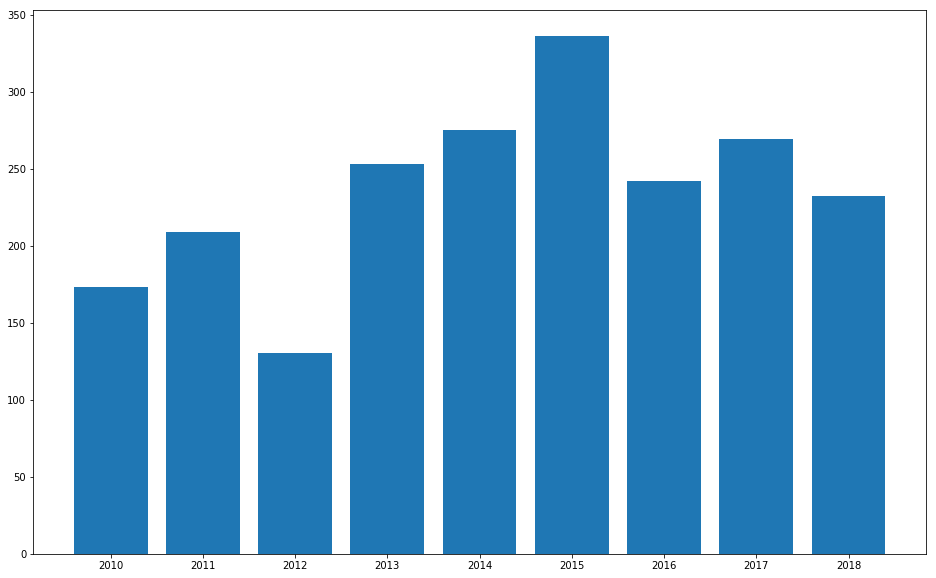

In [14]:
films_by_year = films_by_year[films_by_year.year > 2009]
plt.figure(figsize=(16,10))
plt.bar(films_by_year.year, films_by_year.num_films)
plt.xticks(films_by_year.year)
plt.show()

## Released

Index films view on year:

In [28]:
films = films.set_index(pd.DatetimeIndex(films.released))
years = list(films[films.index.year > 2009].index.year.unique())
years = sorted(years)

In [29]:
years

[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

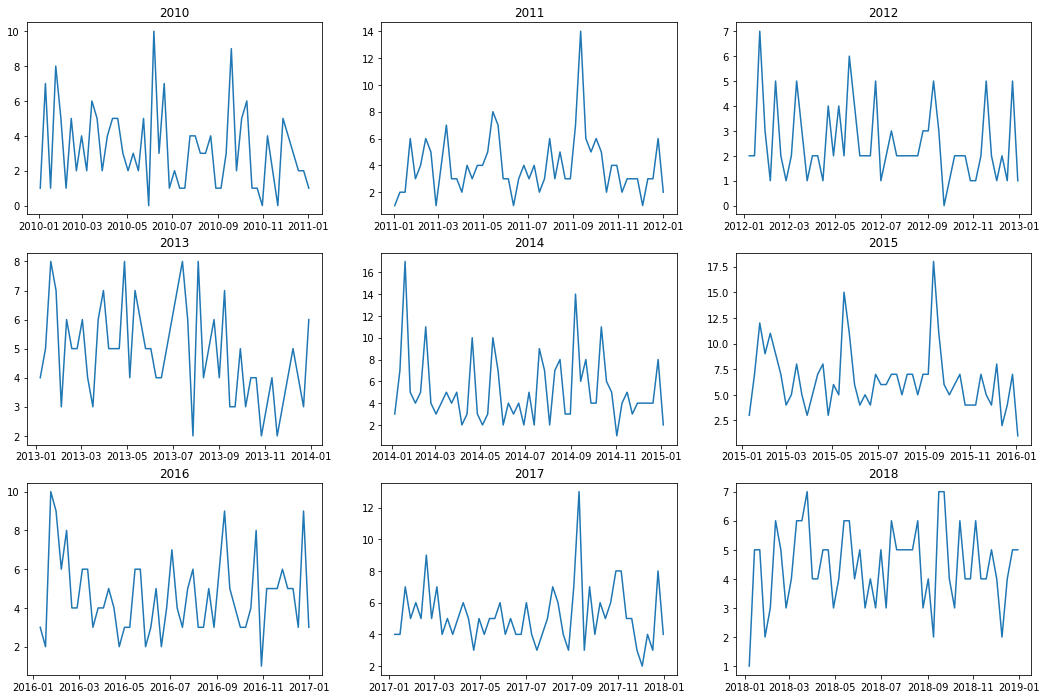

In [30]:
plt.figure(figsize=(18,12))
for i,x in enumerate(years):
    plt.subplot(3,3,i + 1)
    films_that_year = films[films.index.year == x]
    weekly = films_that_year.resample('W').count()['id']
    plt.plot(weekly.index, weekly.values)
    plt.title(str(x))

- No standard release schedule for all films over the years
- At least in the past couple years September - October has packed window

## Genres

In [40]:
genres_one_hot = pd.read_sql_query(scripts.read("genres_one_hot.sql"), engine)

In [41]:
genres_one_hot.head()

,id,horror,mystery,thriller,action,crime,drama,comedy,history,war,...,sci-fi,biography,fantasy,animation,adventure,family,sport,western,documentary,musical
0,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,1,0,1,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,5,0,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
genres_only = genres_one_hot.drop("id", axis=1)
genres_only.head()

,horror,mystery,thriller,action,crime,drama,comedy,history,war,music,...,sci-fi,biography,fantasy,animation,adventure,family,sport,western,documentary,musical
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,1,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


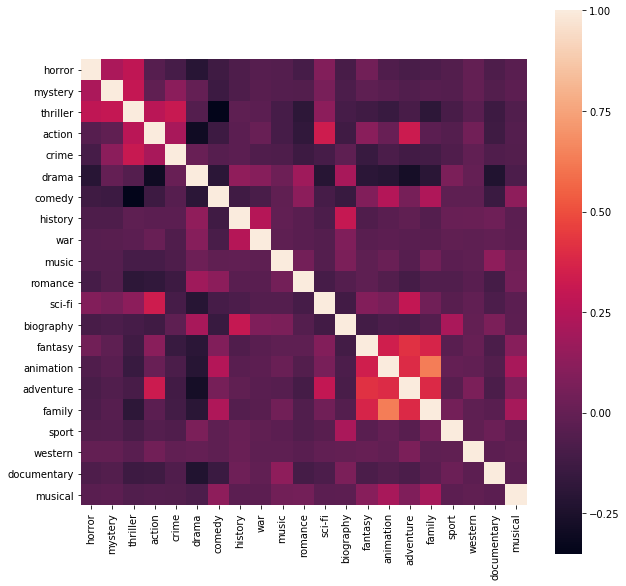

In [50]:
plt.figure(figsize=(10,10))
sns.heatmap(genres_only.corr(), square=True)

- Pearson correlation matrix
- animation/family, fantasy/adventure, biography/history, crime/thriller all have strong postive correlations
- adventure/drama has a surprising weak negative correlation
- no comedy/thriller movies lol

In [53]:
films_w_genres = pd.read_sql_query(scripts.read('films_join_hot_genres.sql'), engine)

In [54]:
films_w_genres.head()

,id,title,released,runtime,rated,budget,total_gross,award_noms,award_wins,oscar_noms,...,sci-fi,biography,fantasy,animation,adventure,family,sport,western,documentary,musical
0,1,Insidious: The Last Key,2018-01-05,103,PG-13,10000000.000,167885588.000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,The Strange Ones,2017-12-07,81,R,nan,nan,7,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Stratton,2017-09-01,95,R,nan,nan,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,Sweet Country,2017-09-06,113,R,nan,nan,8,0,0,...,0,0,0,0,1,0,0,0,0,0
4,5,The Commuter,2018-01-12,105,PG-13,40000000.000,200900000.000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
